In [23]:
# Libraries 
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# So the notebook doesn't yell at me
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Zillow .py stuff and functions
#from acquire 
#from prepare 

#Some stuff I might have forgotten
#import env
#from env import user, password, host
from scipy import stats



# sklearn modeling stuff
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SequentialFeatureSelector
from sklearn.model_selection import train_test_split
#from evaluate import select_kbest_feature_engineering, rfe_feature_engineering
#from evaluate import scaled_data, assessed_value_regression_plot, baseline_vs_model_regression
from scipy.stats import pearsonr, spearmanr

from sklearn.model_selection import train_test_split

from math import sqrt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor



# Acquisition
- read from url csv

In [24]:
df = pd.read_csv('https://query.data.world/s/r6psulerzbz7pdb2vctbrfig5rx6fi')
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [25]:
df.shape

(1586614, 13)

In [26]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [30]:
df.describe().T
# The average of the beer_abv column seems high. I will have to check for outliers.

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3.130099e+03,5.578104e+03,1.000000e+00,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586614.0,1.224089e+09,7.654427e+07,8.406720e+08,1.173224e+09,1.239203e+09,1.288568e+09,1.326285e+09
review_overall,1586614.0,3.815581e+00,7.206219e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586614.0,3.735636e+00,6.976167e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586614.0,3.841642e+00,6.160928e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586614.0,3.743701e+00,6.822184e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586614.0,3.792860e+00,7.319696e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1518829.0,7.042387e+00,2.322526e+00,1.000000e-02,5.200000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1586614.0,2.171279e+04,2.181834e+04,3.000000e+00,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


In [31]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

# Preparation 

- Consider dropping review_time, beer_beerid and review_profilename column
- See if you can get the average of the styles 

In [8]:
# Drop useless columns

df = df.drop(columns=['review_time', 'beer_beerid', 'review_profilename'])
df.head()

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
0,10325,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
1,10325,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2
2,10325,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
3,10325,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0
4,1075,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7


In [9]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_overall', 'review_aroma',
       'review_appearance', 'beer_style', 'review_palate', 'review_taste',
       'beer_name', 'beer_abv'],
      dtype='object')

In [10]:
df.dtypes

brewery_id             int64
brewery_name          object
review_overall       float64
review_aroma         float64
review_appearance    float64
beer_style            object
review_palate        float64
review_taste         float64
beer_name             object
beer_abv             float64
dtype: object

In [11]:
# Turn this into a function

df = df[df["beer_abv"] <= 12.0]
df = df[df["beer_abv"] >=3.0]
# Create a lower limit on beer_abv



# Exploration

#### Question 1: What is the distribution of each variable?

Univariate up first
- We'll explore our variables with visualizations.

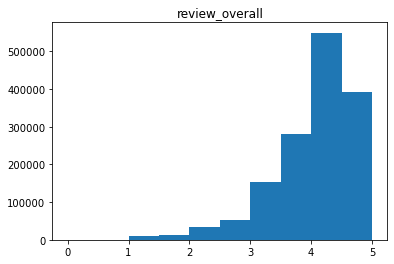

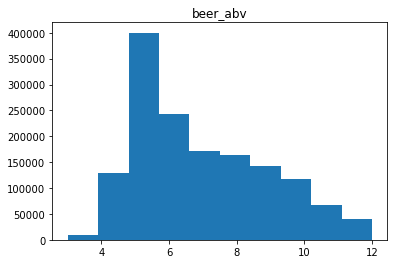

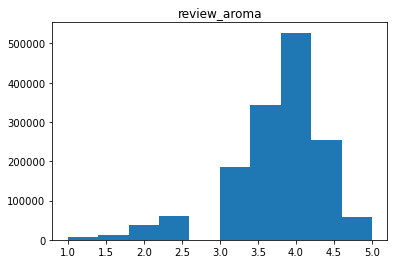

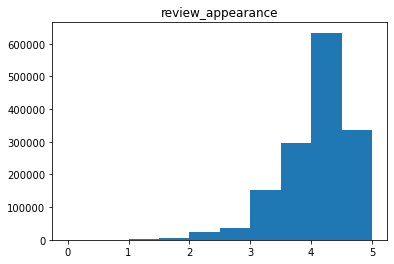

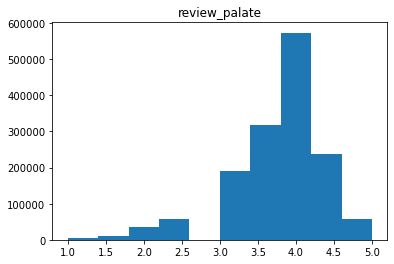

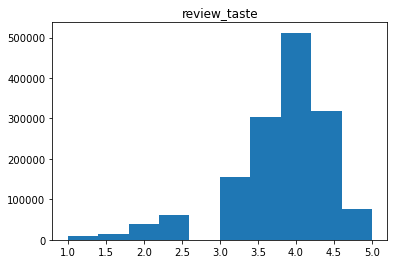

In [12]:
continuous_variables = ['brewery_id', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']


plt.hist(df['review_overall'])
plt.title('review_overall')
plt.show()

plt.hist(df['beer_abv'])
plt.title('beer_abv')
plt.show()

plt.hist(df['review_aroma'])
plt.title('review_aroma')
plt.show()

plt.hist(df['review_appearance'])
plt.title('review_appearance')
plt.show()

plt.hist(df['review_palate'])
plt.title('review_palate')
plt.show()

plt.hist(df['review_taste'])
plt.title('review_taste')
plt.show()

### Takeaways

- beer_abv has a slight right skew.  
- review_overall has a definite left skew, so does review_appearance. Look into this.
- review_taste, review_palate, review_aroma have a relatively universal distribution.
- review_taste and review_palate have nearly identical distribution. I will want to use spearman's correlation test when testing the linear relationships due to the skew.

NameError: name 'col' is not defined

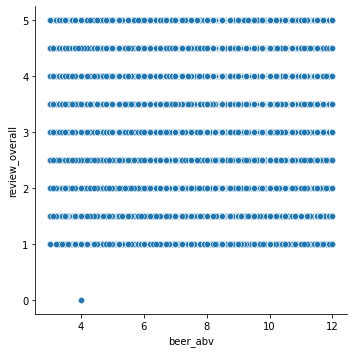

In [13]:
sns.relplot(x=df.beer_abv, y=df.review_overall)
plt.title(col)
plt.show()

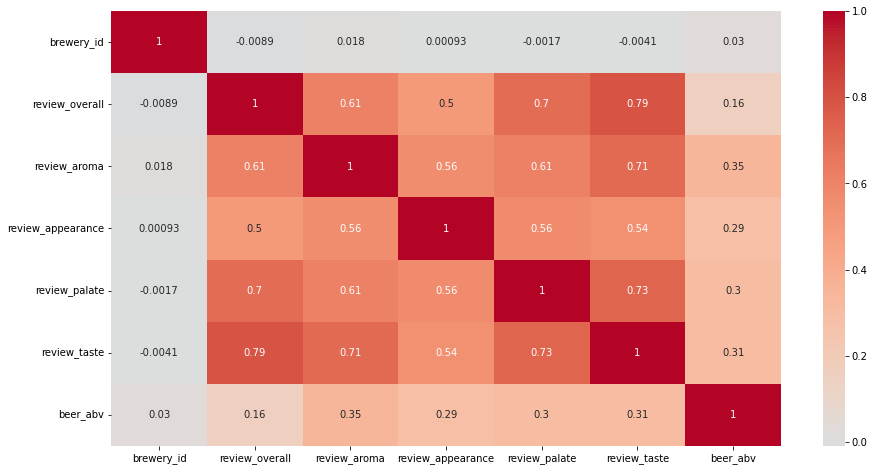

In [14]:
# Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df[continuous_variables].corr(), cmap='coolwarm', center=0, annot=True)
plt.show()

# As we can see here, brewery_id has nothing to do with review_overall (obvisouly).
# BUT, we do see some interesting correlations0

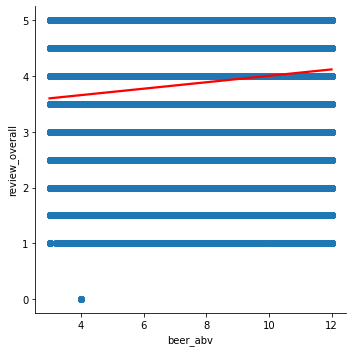

In [15]:
sns.lmplot(x="beer_abv", y="review_overall", data=df, line_kws={'color': 'red'})
plt.show()

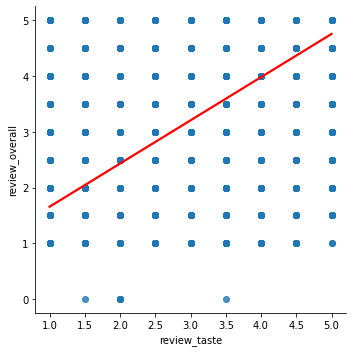

In [16]:
sns.lmplot(x="review_taste", y="review_overall", data=df, line_kws={'color': 'red'})
plt.show()

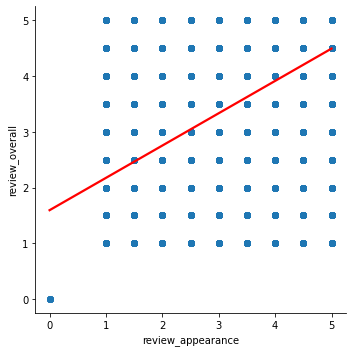

In [17]:
sns.lmplot(x="review_appearance", y="review_overall", data=df, line_kws={'color': 'red'})
plt.show()

# clean that outlier up

In [38]:
# splitting the data into train, validate, and test
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(888503, 13) (380788, 13) (317323, 13)


In [44]:
# setting independent/dependent variables in ea. sub-dataset

x_train = train.drop(columns=["review_overall"])
y_train = train.review_overall

x_validate = validate.drop(columns=["review_overall"])
y_validate = validate.review_overall

x_test = test.drop(columns=["review_overall"])
y_test = test.review_overall

# Write README and plan down. 

You can use your expertise to determine ABV outliers. 
Ask for IBU.
Ask for geography. If you had the location of the breweries, you'd be able to tell that data.
Do the accuracy sensitivity thing.
Linear correlation with reivew_overall. What should the brewery focus on?
What affects taste? What affects visual appearance?

## Multivariate Exploration

## Questions to explore:

2. Is review_taste score connected to the review_overall score?
3. Does beer_abv have any correlation with the overall review score?
4. Are review_taste and review_palate the same thing or what?
    - Because they look and sound exactly the same.
5. Variables "review_taste" and "review_aroma" why are they so strongly correlated?


#### Question 2. Is review_taste score connected to the review_overall score?

Null Hypothesis: review_taste is independent of review_overall.

Alternate Hypothesis: review_taste is correlated with review_overall.

Alpha =0.01

In [48]:
# Calculate Pearson Correlation Coefficient for review_taste/review_overall comparison

x = x_train.review_taste
y = y_train

corr, p = stats.pearsonr(x, y)
corr, p

(0.7899403417771013, 0.0)

In [52]:
### Decide whether to reject or accept the null hypothesis

if p < 0.01:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


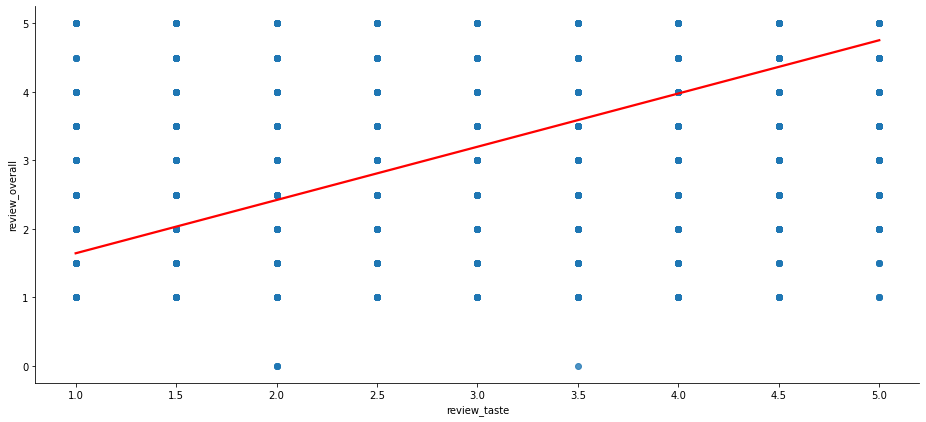

In [53]:
taste_and_overall = sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, x_vars = ['review_taste'],
                 y_vars = ['review_overall'])

taste_and_overall.fig.set_size_inches(16,7)

#### Question 3:  Does beer_abv have any correlation with the overall review score?

exam_spearman = train.drop(columns=['student_id']).corr(method='spearman')
exam_spearman

In [65]:
# Since my variables are not normally distributed, I might choose Spearman instead.

beer_spearman = train.drop(columns=['brewery_id', 'brewery_name', 'review_aroma',
       'review_appearance', 'beer_style', 'review_palate', 'review_taste',
       'beer_name', 'review_time', 'beer_beerid']).corr(method='spearman')
beer_spearman

,review_overall,beer_abv
review_overall,1.00000,0.17392
beer_abv,0.17392,1.00000


Correlation Coefficient: nan
P-value: nan


#### Question 4.

Are review_taste and review_palate the same thing or what?
    - Because they look and sound exactly the same. I will want to use spearman's correlation test when testing the linear relationships due to the skew.

Null Hypothesis: The mean of review_taste is equal to review_palate.
Alternate Hypothesis: The mean of review_taste is significantly different than review_palate.




In [73]:
print(train.review_taste.var())
print(train.review_palate.var())
alpha = .05


0.5356833630041596
0.4664890660132477


In [77]:
t, p = stats.ttest_ind(train.review_taste, train.review_palate, equal_var=True)
t, p / 2

(46.15114694936878, 0.0)

In [75]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


In [54]:
# let's generate an average baseline prediction

baseline_prediction = train["review_overall"].mean()
baseline_prediction

3.8152803085639553

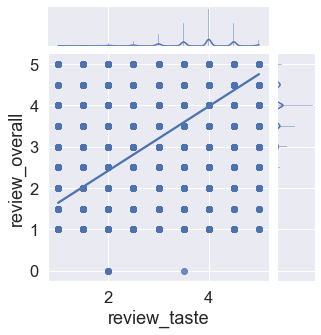

In [60]:
sns.jointplot(x="review_taste", y="review_overall", data=train,  kind='reg', height=5)
plt.show()

# Modeling